<a href="https://colab.research.google.com/github/WinstonMuijs/Natural-Language-Processing/blob/main/supervised_Learning_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

churn_df = pd.read_csv("telecom_churn_clean.csv")

X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X, y)

X_new = np.array([[56.8, 17.5], 
                  [35.6,21.9], 
                  [87.3,99.2]])

pred = knn.predict(X_new)

print(f"predictions are:  {pred}")


predictions are:  [1 0 1]


In [30]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
from matplotlib import pyplot as plt 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
pred = knn.predict(X_test)
metrics.accuracy_score(y_test, pred)

0.867

In [32]:
knn.score(X_test, y_test)

0.867

In [33]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors = neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

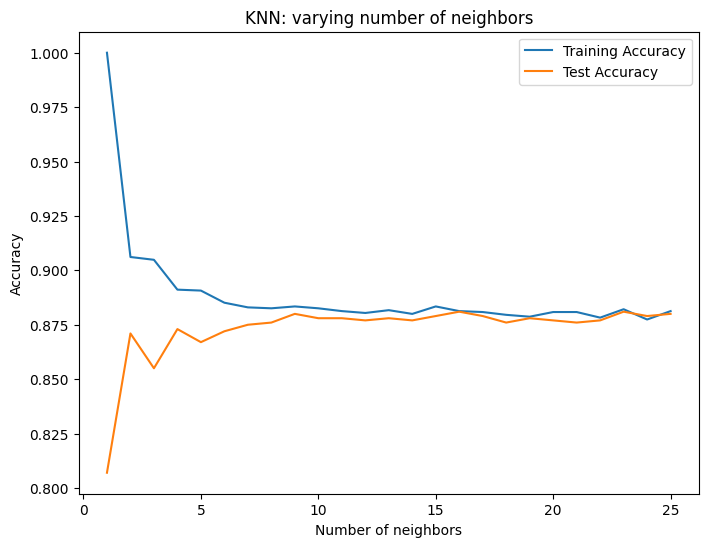

In [34]:
plt.figure(figsize=(8,6))
plt.title("KNN: varying number of neighbors")
plt.plot(neighbors, train_accuracies.values(),label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()